In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []

# Initial parameters
L_0 = 550 # Fixed Markov chain length
#x3 = 0.78547

# Define the Ackley 2 function
def func(x,y):
    x3 = 0.78547
    term1 = 1 / (1 + (x - y)**2)
    term2 = np.sin((np.pi * y + x3) / 2)
    # Prevent overflow in term3 by limiting the exponent
    exponent = ((x + y) / y - 2)**2
    exponent = np.clip(exponent, -100, 100)  # Limit the exponent range
    term3 = np.exp(exponent)
    return term1 + term2 + term3

def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = func(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((3000, L_0, data_dimensions))

    for i in range(3000):
        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = func(new_x, new_y) - func(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y



            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = func(current_x, current_y)

        best_solution = (current_x,current_y)
        best_value = func(current_x,current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        #earlier schedule
        temp = temp*0.95

        # Decrease temperature once every 5 iterations
        #if (i + 1) % 5 == 0:
        #  delta_T = temp * 0.05
        #  temp -= delta_T



    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data




In [ ]:
## Example usage
temp =1500 # Initial temperature
bounds = (-5, 5)  # Bounds for the Ackley function
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data = simulate(temp, func, bounds)

print(f"Best Solution: {best_solution}")
print(f"Best Value: {best_value}")



Best Solution: (-3.138984808066697, -4.999970442627864)
Best Value: 0.4487899086640892


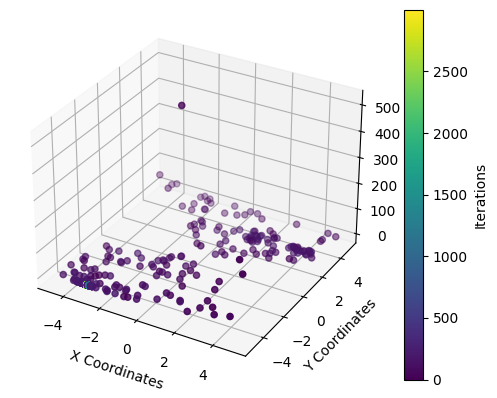

In [ ]:
# Extract x and y coordinates from the states array
x_coords = [state[0] for state in states]
y_coords = [state[1] for state in states]

# Extract the function values
z_coords = function_values

# Extract the iterations
iterations_array = iterations

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points with color scheme based on iterations
sc = ax.scatter(x_coords, y_coords, z_coords, c=iterations_array, cmap='viridis')

# Add color bar to show iteration color scheme
plt.colorbar(sc, label='Iterations')

# Set labels
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Function Value (z)')

# Show the plot
plt.show()


In [ ]:
print("Size of temperature array:", len(temperatures))
print("Size of iteration array:", len(iterations))

Size of temperature array: 3000
Size of iteration array: 3000


In [ ]:
target_temp = 1
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))

function_values_for_temp = simulation_data[closest_iteration, :, 2]

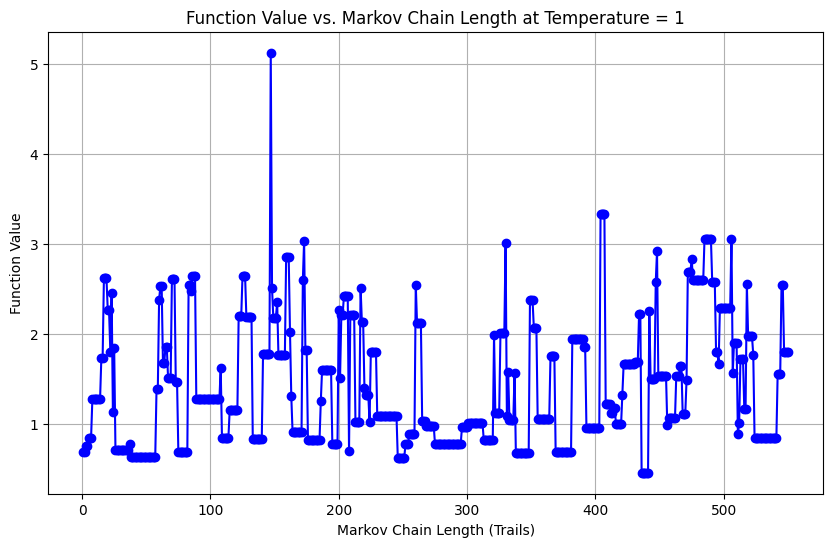

In [ ]:
# Plot the function values vs. Markov chain length (1 to 550 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title(f'Function Value vs. Markov Chain Length at Temperature = {target_temp}')
plt.grid(True)
plt.show()

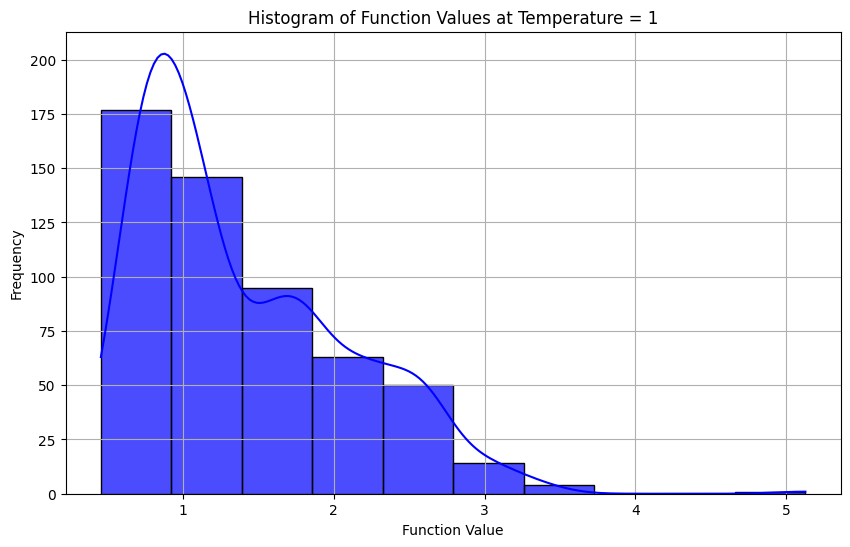

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(function_values_for_temp, bins=10, kde=True, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Function Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Function Values at Temperature = {target_temp}')
plt.grid(True)
plt.show()

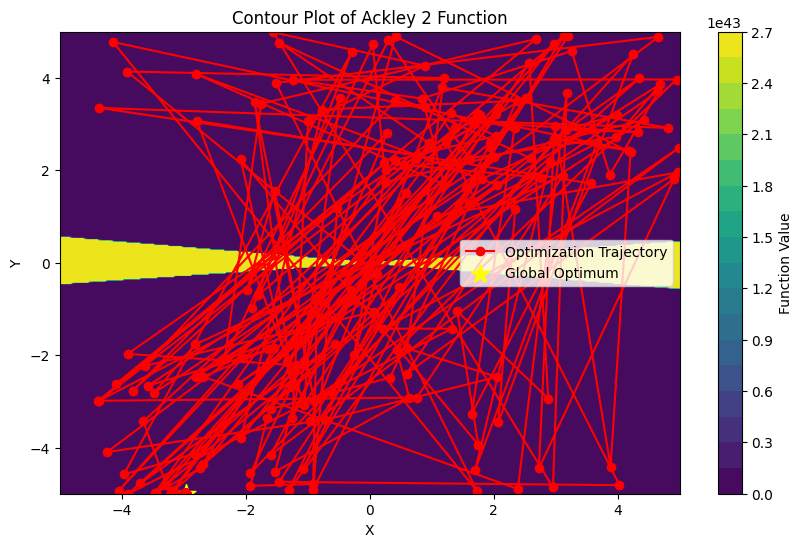

Optimal solution: (-2.957288226537973, -4.9979729524684515)
Function value at optimal solution: 0.4524037322307284


In [ ]:
# Define the Ackley 2 function
def func(x, y):
    x3 = 0.78547
    term1 = 1 / (1 + (x - y)**2)
    term2 = np.sin((np.pi * y + x3) / 2)
    # Prevent overflow in term3 by limiting the exponent
    exponent = ((x + y) / y - 2)**2
    exponent = np.clip(exponent, -100, 100)  # Limit the exponent range
    term3 = np.exp(exponent)
    return term1 + term2 + term3

# Generate data points for plotting
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Plot contour plot of the function
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Ackley 2 Function')

# Assume `states` and `best_solution` have been defined in the context of the simulated annealing process

# Overlay the trajectory
x_traj = [s[0] for s in states]
y_traj = [s[1] for s in states]
plt.plot(x_traj, y_traj, marker='o', color='red', label='Optimization Trajectory')
plt.scatter(best_solution[0], best_solution[1], color='yellow', marker='*', s=200, label='Global Optimum')
plt.legend()

plt.show()

print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)

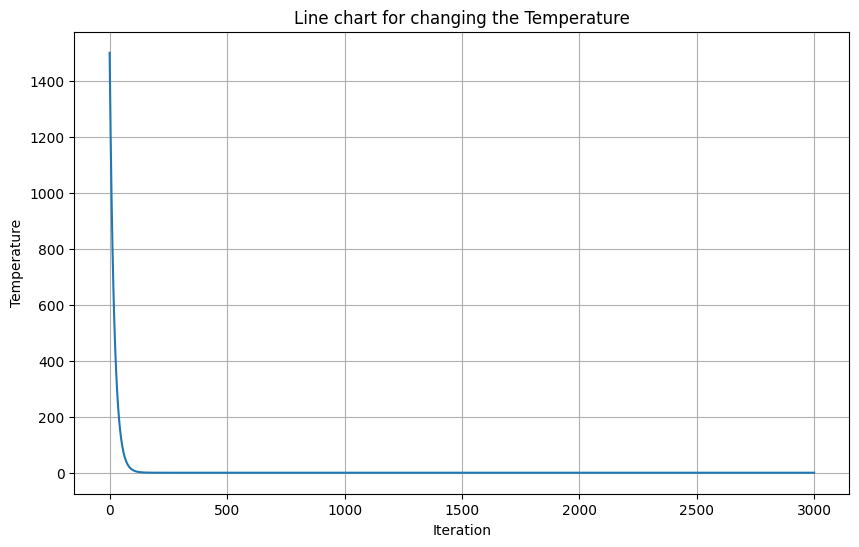

In [ ]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iterations,temperatures)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

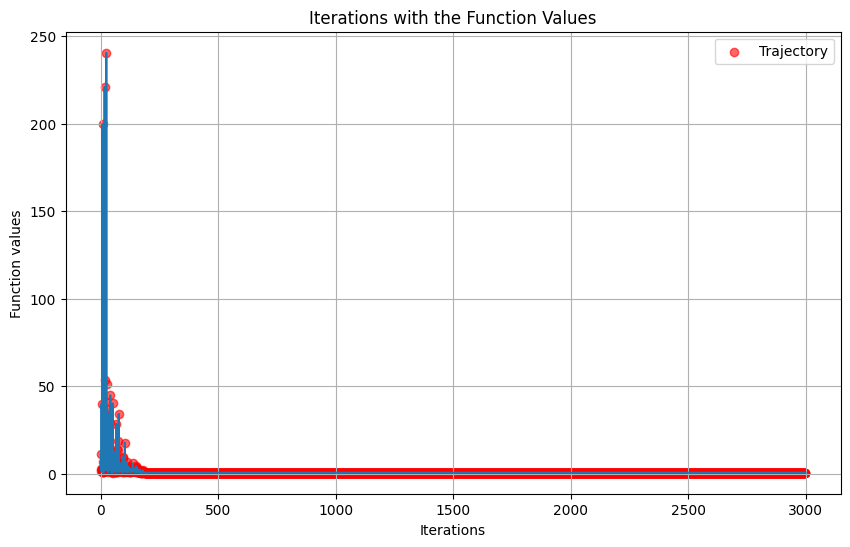

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,function_values)
plt.scatter(iterations,function_values, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('Function values')
plt.title('Iterations with the Function Values')
plt.legend()
plt.grid(True)
plt.show()

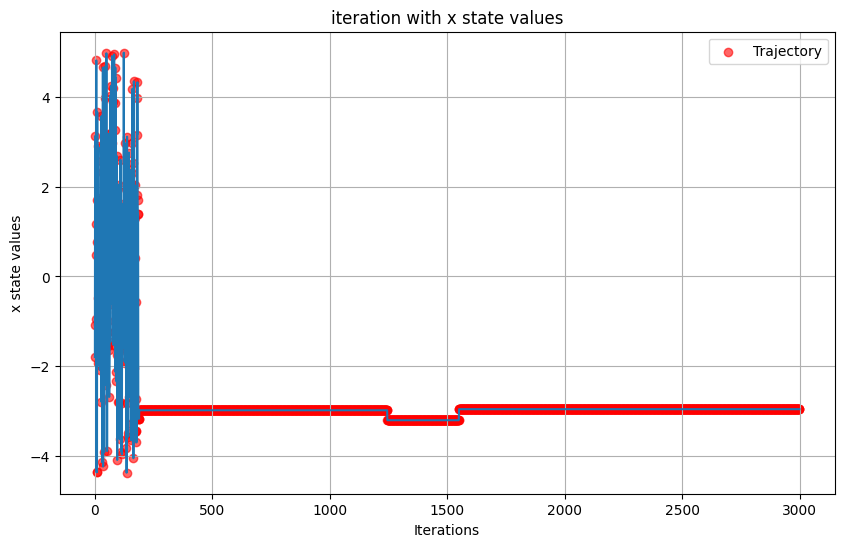

In [ ]:
x = [s[0] for s in states]
y = [s[1] for s in states]
z = [func(s[0], s[1]) for s in states]
plt.figure(figsize=(10, 6))
plt.plot(iterations,x)
plt.scatter(iterations,x, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('x state values')
plt.title('iteration with x state values')
plt.legend()
plt.grid(True)
plt.show()

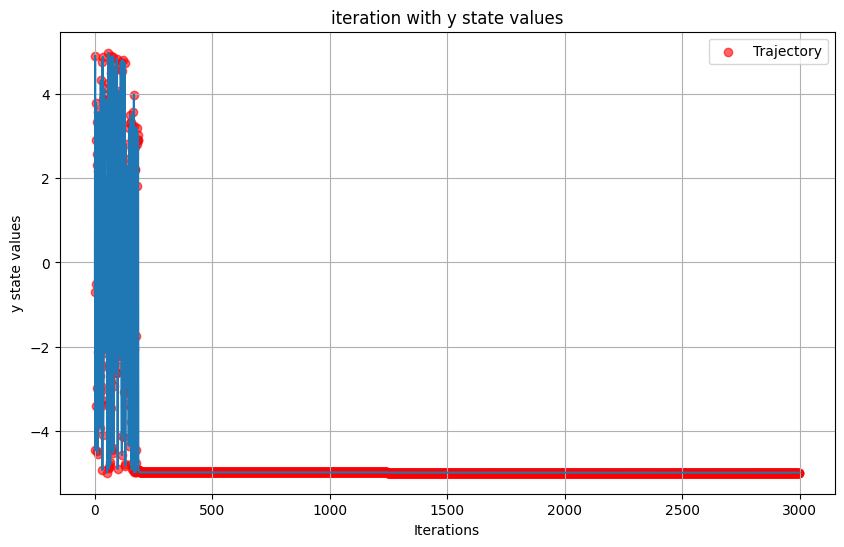

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,y)
plt.scatter(iterations,y, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('y state values')
plt.title('iteration with y state values')
plt.legend()
plt.grid(True)
plt.show()

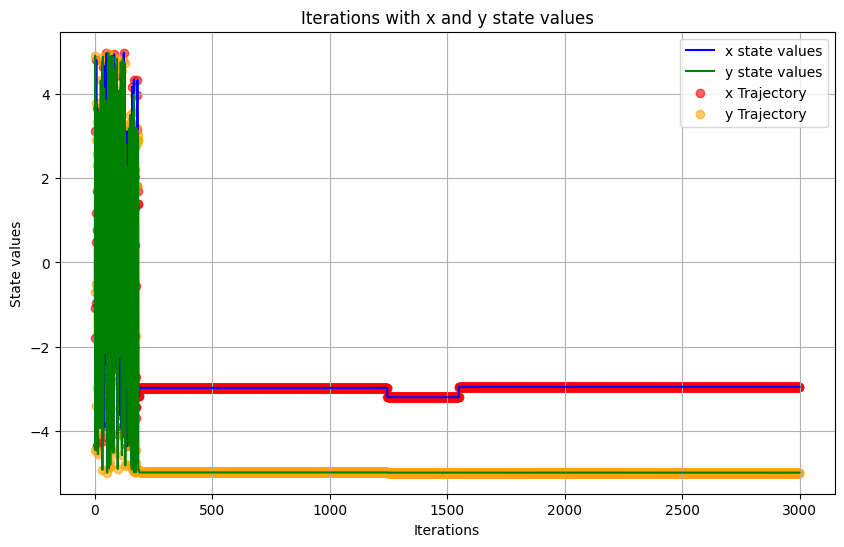

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, x, label='x state values', color='blue')
plt.plot(iterations, y, label='y state values', color='green')
plt.scatter(iterations, x, c='red', label='x Trajectory', alpha=0.6)
plt.scatter(iterations, y, c='orange', label='y Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('State values')
plt.title('Iterations with x and y state values')
plt.legend()
plt.grid(True)
plt.show()

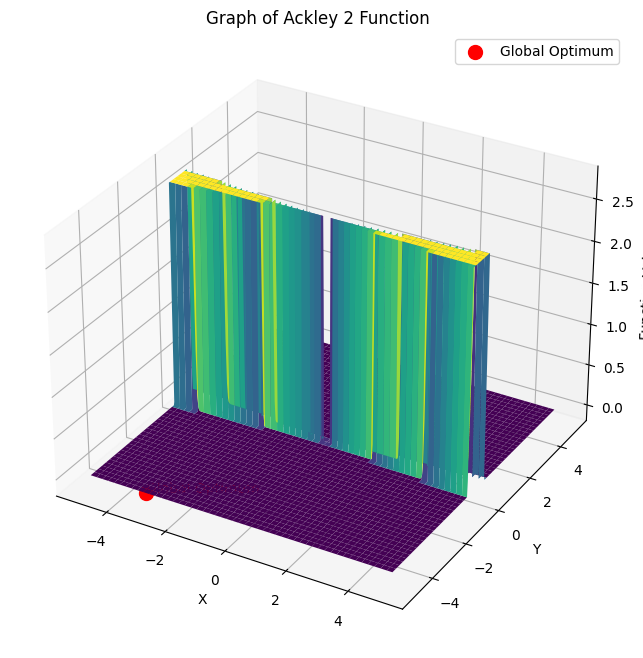

Global Optimum Point: (x=-3.0952380952380953, y=-5.0, z=0.44838852360336867)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ackley2(x, y):
    x3 = 0.78547
    term1 = 1 / (1 + (x - y)**2)
    term2 = np.sin((np.pi * y + x3) / 2)
    # Prevent overflow in term3 by limiting the exponent
    exponent = ((x + y) / y - 2)**2
    exponent = np.clip(exponent, -100, 100)  # Limit the exponent range
    term3 = np.exp(exponent)
    return term1 + term2 + term3

# Generate data points
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = ackley2(X, Y)

# Find global optimum point
global_optimum = np.unravel_index(np.argmin(Z), Z.shape)
global_x = X[global_optimum]
global_y = Y[global_optimum]
global_z = Z[global_optimum]

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Annotate global optimum point
ax.scatter(global_x, global_y, global_z, color='red', s=100, label='Global Optimum')
ax.text(global_x, global_y, global_z, 'Global Optimum', color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
ax.set_title('Graph of Ackley 2 Function')

plt.legend()
plt.show()

print("Global Optimum Point: (x={}, y={}, z={})".format(global_x, global_y, global_z))


# **Code for Acceptance rate with temperature**

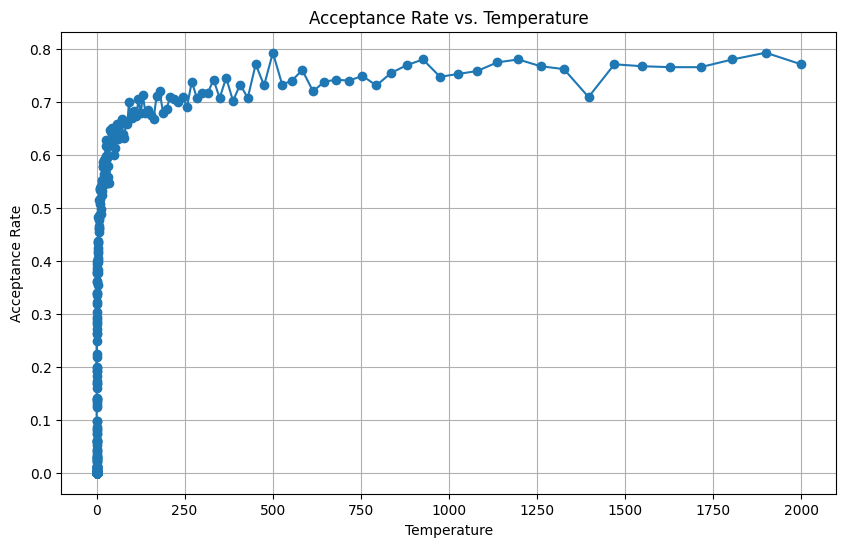

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Arrays for storing temperatures, function values, iterations, states, and acceptance rates
temperatures = []
function_values = []
iterations = []
states = []
acceptance_rates = []

# Initial parameters
L_0 = 550 # Fixed Markov chain length

# Define the Ackley 2 function
def ackley2(x, y):
    x3 = 0.78547
    term1 = 1 / (1 + (x - y)**2)
    term2 = np.sin((np.pi * y + x3) / 2)
    # Prevent overflow in term3 by limiting the exponent
    exponent = ((x + y) / y - 2)**2
    exponent = np.clip(exponent, -100, 100)  # Limit the exponent range
    term3 = np.exp(exponent)
    return term1 + term2 + term3

def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = func(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((3000, L_0, data_dimensions))

    for i in range(3000):
        accepted_moves = 0  # To count the number of accepted moves

        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = func(new_x, new_y) - func(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y
                accepted_moves += 1  # Increment the accepted moves counter

            current_value = func(current_x, current_y)

            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = func(current_x, current_y)

        acceptance_rate = accepted_moves / L_i
        acceptance_rates.append(acceptance_rate)

        best_solution = (current_x, current_y)
        best_value = func(current_x, current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        temp *= 0.95

    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates

# Initial temperature and function bounds
initial_temperature = 2000
bounds = (-5, 5)

# Run the simulation
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates = simulate(initial_temperature, ackley2, bounds)

# Plot acceptance rate vs. temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, acceptance_rates, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs. Temperature')
plt.grid(True)
plt.show()


# From these illustration we select 200K temperature for initial temperature.

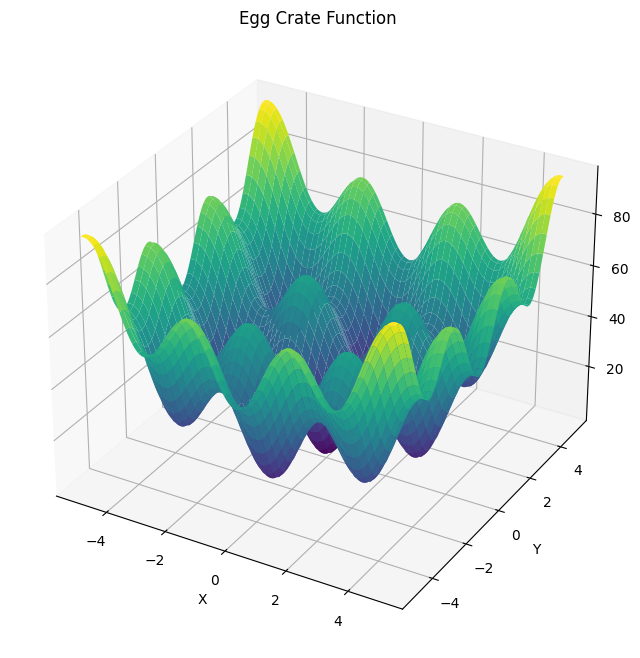

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Egg Crate function
def egg_crate(x, y):
    return x**2 + y**2 + 25 * (np.sin(x)**2 + np.sin(y)**2)

# Create a meshgrid for plotting
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X, Y)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Egg Crate Function')

# Show plot
plt.show()


In [ ]:
import numpy as np

def func(x, y):
    x1 = x
    x2 = y
    x3 = 0.78547
    term1 = 1 / (1 + (x1 - x2)**2)
    term2 = np.sin((np.pi * x2 + x3) / 2)
    term3 = np.exp(((x1 + x2) / x2 - 2)**2)
    return term1 + term2 + term3

print(func(0.78547, 0.78547))


2.9984462561992533
